In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
path="/content/drive/MyDrive/Diplomado/Trabajo final /diabetes.csv"

In [4]:
df=pd.read_csv(path,sep=",")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

#limpieza


In [ ]:
# marco de datos para personas que dieron positivo en diabetes
df_positive = df [df['Outcome'] == 1]
df_positive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
# marco de datos para personas que dieron negativo en diabetes
df_negative = df [df['Outcome'] == 0]
df_negative

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
# crear una función auxiliar
def replace_with_mean(df, value, value_at):
    column_mean = df.loc[df[value] != 0, [value, value_at]].groupby(value_at).mean()
    df.loc[(df[value] == 0) & (df[value_at] == 0), value] = column_mean.iloc[0][0]
    df.loc[(df[value] == 0) & (df[value_at] == 1), value] = column_mean.iloc[1][0]

for colum in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    replace_with_mean(df, colum, 'Outcome')

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [ ]:
z = np.abs(stats.zscore(df))
z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864020,0.035389,0.645088,0.561272,0.167806,0.468492,1.425995,1.365896
1,0.844885,1.205478,0.531332,0.027701,0.300842,0.850452,0.365061,0.190672,0.732120
2,1.233880,2.013741,0.696647,0.420825,0.561272,1.330487,0.604397,0.105584,1.365896
3,0.844885,1.074081,0.531332,0.700491,0.709475,0.632253,0.920763,1.041549,0.732120
4,1.141852,0.502679,2.680419,0.645088,0.123830,1.549727,5.484909,0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,0.679891,0.295240,2.102798,0.258960,0.065980,0.908682,2.532136,0.732120
764,0.547919,0.009942,0.200703,0.251964,0.300842,0.633295,0.398282,0.531023,0.732120
765,0.342981,0.022908,0.035389,0.700491,0.506779,0.908638,0.685193,0.275760,0.732120
766,0.844885,0.141338,1.027275,0.420825,0.561272,0.341323,0.371101,1.170732,1.365896


In [ ]:
df = df [(z < 3).all(axis =1 )]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.000000,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,27.235457,130.287879,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,130.287879,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,33.000000,206.846154,30.1,0.349,47,1


## Historigramas

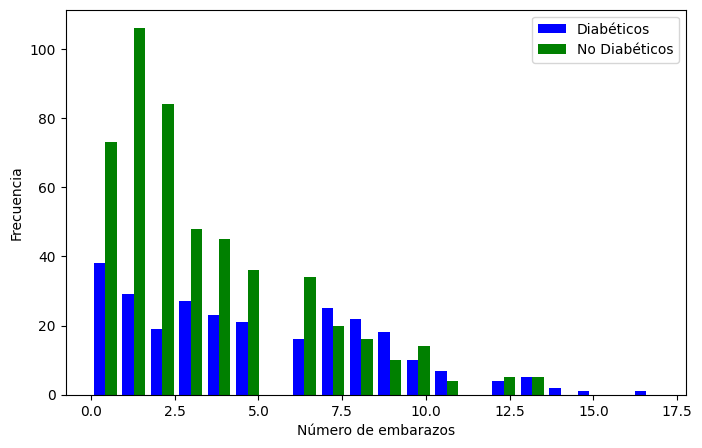

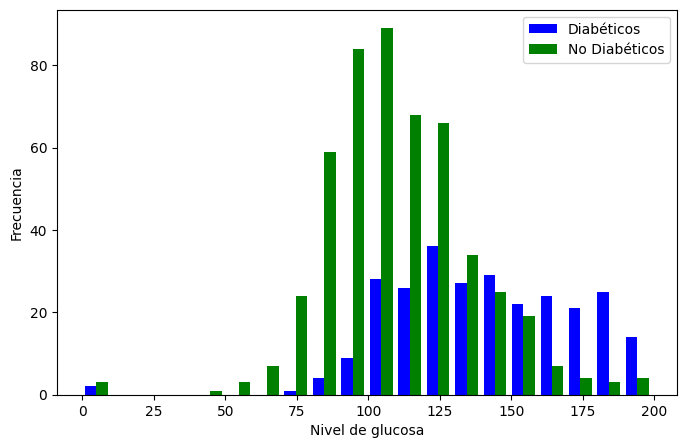

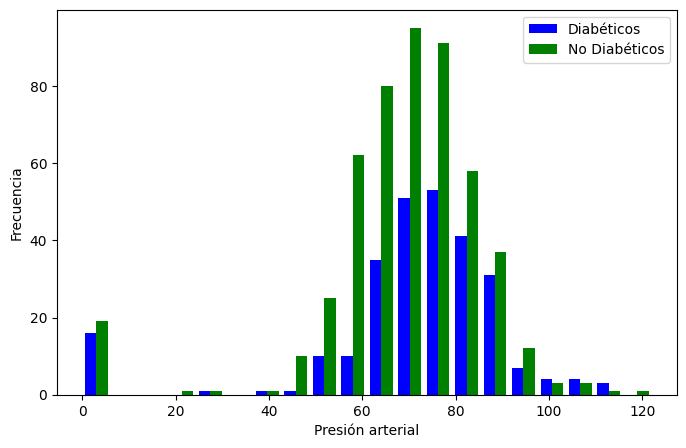

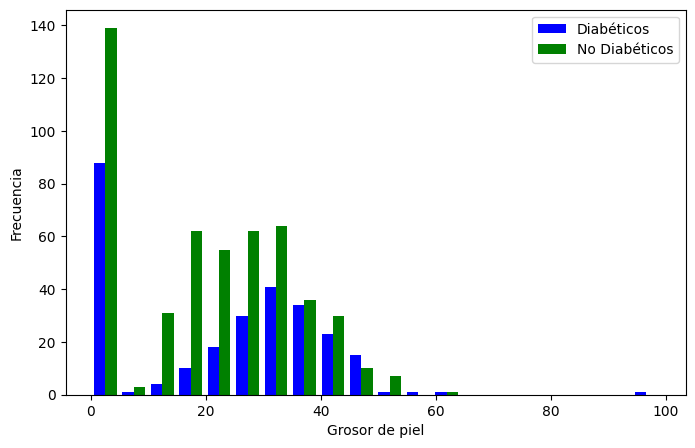

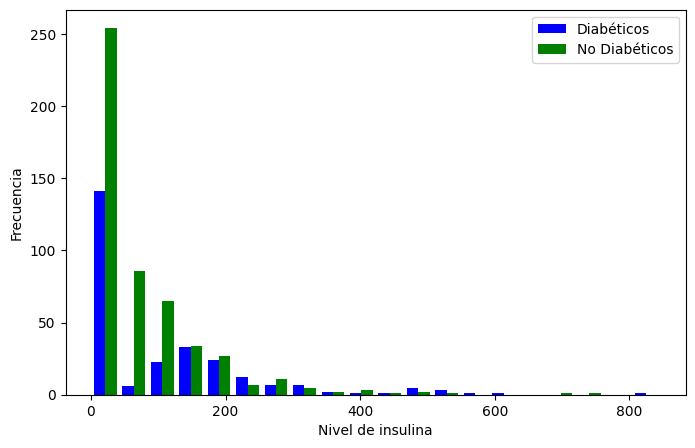

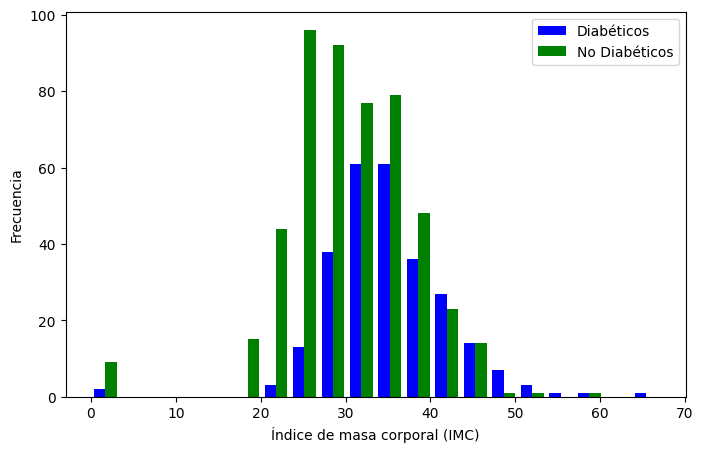

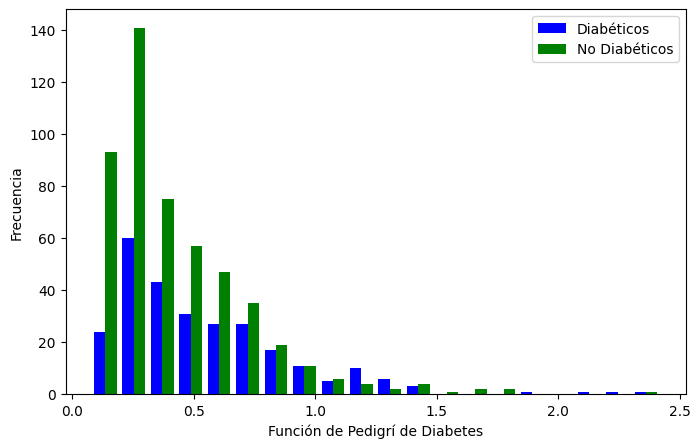

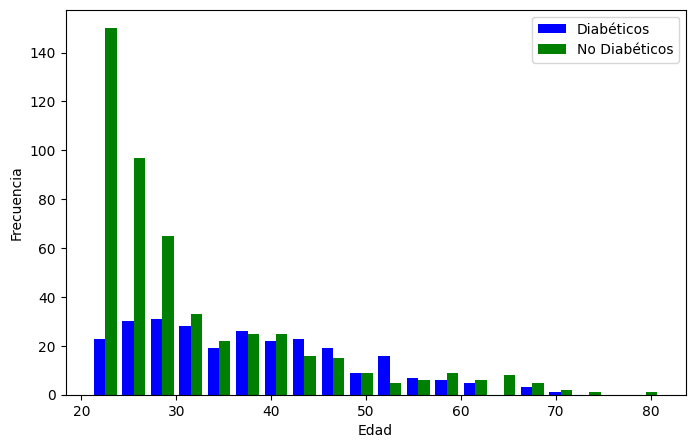

In [ ]:
# Embarazos
plt.figure(figsize=(8, 5))
plt.hist([df_positive['Pregnancies'], df_negative['Pregnancies']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Número de embarazos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# Glucosa
plt.figure(figsize=(8, 5))
plt.hist([df_positive['Glucose'], df_negative['Glucose']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Nivel de glucosa')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# Presión arterial
plt.figure(figsize=(8, 5))
plt.hist([df_positive['BloodPressure'], df_negative['BloodPressure']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Presión arterial')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# SkinThickness
plt.figure(figsize=(8, 5))
plt.hist([df_positive['SkinThickness'], df_negative['SkinThickness']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Grosor de piel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# Insulina
plt.figure(figsize=(8, 5))
plt.hist([df_positive['Insulin'], df_negative['Insulin']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Nivel de insulina')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# IMC
plt.figure(figsize=(8, 5))
plt.hist([df_positive['BMI'], df_negative['BMI']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Índice de masa corporal (IMC)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# DiabetesPedigreeFunction
plt.figure(figsize=(8, 5))
plt.hist([df_positive['DiabetesPedigreeFunction'], df_negative['DiabetesPedigreeFunction']], bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Función de Pedigrí de Diabetes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Salto de línea
print("\n")

# Edad
plt.figure(figsize=(8, 5))
plt.hist([df_positive['Age'], df_negative['Age']],bins=20, color=['blue', 'green'], label=['Diabéticos', 'No Diabéticos'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()



#Aprendizaje automatico

##Preparación del conjunto de datos (división y normalización)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("/content/drive/MyDrive/Diplomado/Trabajo final /diabetes.csv")

# Preparar los datos
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)

# 4. Modelado

## 4.1 Arbol de decisiones

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
 [[75 24]
 [15 40]]


## 4.2 Random Forest

In [ ]:
# Preprocesar los datos
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Realizar balanceo de clases utilizando sobremuestreo
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = over_sampler.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Define el modelo
model = RandomForestClassifier()

# Define la cuadrícula de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Define la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print('Mejores parámetros:', grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Guardar el modelo entrenado
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Evaluar el modelo
y_pred = best_model.predict(X_test)

# Imprimir las métricas de evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy: 0.81
Precision: 0.7889908256880734
Recall: 0.8514851485148515
F1 Score: 0.819047619047619


## Random Forest mejorado ✌

In [ ]:
# Preprocesar los datos (reemplaza df con tu DataFrame)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Realizar balanceo de clases utilizando sobremuestreo
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = over_sampler.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Define el modelo
model = RandomForestClassifier()

# Define la cuadrícula de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Define la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print('Mejores parámetros:', grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Guardar el modelo entrenado
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Evaluar el modelo
y_pred = best_model.predict(X_test)

# Imprimir las métricas de evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.855
Precision: 0.8050847457627118
Recall: 0.9405940594059405
F1 Score: 0.8675799086757989


## 4.3 Redes Neuronales Convolucionales

In [ ]:
# Prepare the data
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Make predictions
y_pred = np.round(model.predict(X_test))

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/50
62/62 [==============================] - 2s 8ms/step - loss: 0.6804 - accuracy: 0.5912
Epoch 2/50
62/62 [==============================] - 0s 7ms/step - loss: 0.6328 - accuracy: 0.6694
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.6906
Epoch 4/50
62/62 [==============================] - 0s 7ms/step - loss: 0.5523 - accuracy: 0.7264
Epoch 5/50
62/62 [==============================] - 0s 6ms/step - loss: 0.5241 - accuracy: 0.7410
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 0.5021 - accuracy: 0.7508
Epoch 7/50
62/62 [==============================] - 1s 10ms/step - loss: 0.4868 - accuracy: 0.7638
Epoch 8/50
62/62 [==============================] - 1s 9ms/step - loss: 0.4751 - accuracy: 0.7736
Epoch 9/50
62/62 [==============================] - 0s 8ms/step - loss: 0.4675 - accuracy: 0.7720
Epoch 10/50
62/62 [==============================] - 0s 7ms/step - loss: 0.4608 - accuracy: 0.7671
Epoch 11/50
62/62 

## 4.4 Support vector machine (SVM)

In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('Outcome', axis=1)  # Utilizamos 'Outcome' como la columna objetivo
y = df['Outcome']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
svm_classifier = SVC()

# Entrenar el clasificador SVM
svm_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el informe de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

